In [34]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn import preprocessing;
#from sklearn.model_selection import cross_validation;
from sklearn.model_selection import train_test_split
from sklearn import linear_model;


In [35]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("prices.csv"))

def prepare_data(df,forecast_col,forecast_out,test_size):

    a1 = df[forecast_col].shift(1)
    a2 = df[forecast_col].shift(2)
    df = df.join(a1, rsuffix='_yesterday')
    df = df.join(a2, rsuffix='_dayb4_yesterday')
    #df = df[:-forecast_out]
    df = df[2:] # to remove na values in new columns occured due to shift down
    
    label = df[forecast_col].shift(-forecast_out);#creating new column called label with the last 5 rows as nan

    df1 = df.join(label, rsuffix='_frcst')
    

    X = df1[[forecast_col, 'close_yesterday', 'close_dayb4_yesterday']]; #creating the feature array
    #X = np.array(df1[[forecast_col, 'close_yesterday', 'close_dayb4_yesterday']]); #creating the feature array
    
    ## Below i am going to  create a new dataframe with 2 columns to find correlations and scatter plots 
    ## OLD CODE, NOT REQUIRED
    #a = np.array(df[forecast_col])
    #a = a[:-forecast_out]
    #b = df[forecast_col].shift(-forecast_out)
    #b.dropna(inplace = True)
    #b = np.array(b)
    #dict = {'close': a , 'close_frcst': b}
    #df1 = pd.DataFrame(data = dict)
    
    X = preprocessing.scale(X) #processing the feature array
    X_lately = X[-forecast_out:] #creating the column i want to use later in the predicting method X_Lately = df[]
    
    X = X[:-forecast_out] # X that will contain the training and testing
    label.dropna(inplace=True); #dropping na values
    
    y = label  # assigning Y
    #y = np.array(label)  # assigning Y
    X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size= test_size) # 

    response = [X_train,X_test , Y_train, Y_test , X_lately, X, y, df1];
    return response;


In [36]:
from IPython.display import display, HTML


df = pd.read_csv("prices.csv") #loading the csv file

display(HTML(df.head(500).to_html()))

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
5,2016-01-12 00:00:00,WLTW,115.510002,115.550003,114.500000,116.059998,1098000.0
6,2016-01-13 00:00:00,WLTW,116.459999,112.849998,112.589996,117.070000,949600.0
7,2016-01-14 00:00:00,WLTW,113.510002,114.379997,110.050003,115.029999,785300.0
8,2016-01-15 00:00:00,WLTW,113.330002,112.529999,111.919998,114.879997,1093700.0
9,2016-01-19 00:00:00,WLTW,113.660004,110.379997,109.870003,115.870003,1523500.0


In [37]:
df = pd.read_csv("prices.csv") #loading the csv file
print(len(df['symbol'].unique()))
df['symbol'].value_counts()


501


IBM     1762
INTU    1762
AIZ     1762
AXP     1762
DRI     1762
C       1762
APH     1762
FOXA    1762
ULTA    1762
AVB     1762
AON     1762
MCD     1762
CTXS    1762
PCAR    1762
GRMN    1762
FTI     1762
AEP     1762
HSIC    1762
SNA     1762
JWN     1762
ETN     1762
WYN     1762
MYL     1762
XRAY    1762
PFE     1762
NBL     1762
ADM     1762
FE      1762
ADI     1762
TXT     1762
        ... 
PSX     1008
TRIP    1008
MPC     1008
HCA     1008
KORS    1008
TDG     1008
ABBV    1008
NLSN    1008
FBHS    1008
XYL     1008
FB      1008
DLPH    1008
ZTS      987
COTY     896
MNK      894
NWS      892
NWSA     892
EVHC     853
ALLE     786
SYF      504
NAVI     504
QRVO     504
CFG      504
WRK      385
PYPL     378
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64

In [38]:
df=df[df.symbol=='MRO'] #choosing stock symbol


## Defining Training and Testing data and finding correlation between variables

In [39]:



forecast_col = 'close'#choosing which column to forecast
forecast_out = 5 #how far to forecast 
test_size = 0.2; #the size of my test set

X_train, X_test, Y_train, Y_test , X_lately, X, y, df1 = prepare_data(df,forecast_col,forecast_out,test_size); #calling the method were the cross validation and data preperation is in

df1.dropna(inplace = True) # to drop last 5 na values from df1
#Finding correlation by 2 methods

#first method
print(df1[['close','close_yesterday','close_dayb4_yesterday','close_frcst']].corr())

print('')

# second method
from scipy.stats import pearsonr
coeff, _ = pearsonr(df1['close'], df1['close_frcst'])
print('Pearson Coefficient between close and close_frcst: ',coeff)

                          close  close_yesterday  close_dayb4_yesterday  \
close                  1.000000         0.996880               0.994048   
close_yesterday        0.996880         1.000000               0.996877   
close_dayb4_yesterday  0.994048         0.996877               1.000000   
close_frcst            0.985903         0.983192               0.980087   

                       close_frcst  
close                     0.985903  
close_yesterday           0.983192  
close_dayb4_yesterday     0.980087  
close_frcst               1.000000  

Pearson Coefficient between close and close_frcst:  0.9859028319609835


In [40]:
print(type(X_test))

<class 'numpy.ndarray'>


In [41]:
print(X_test.shape)
print(Y_test.shape)

(351, 3)
(351,)


## Scatter Plot Between Variables Close and Close_Forecast 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Close_Forecast')

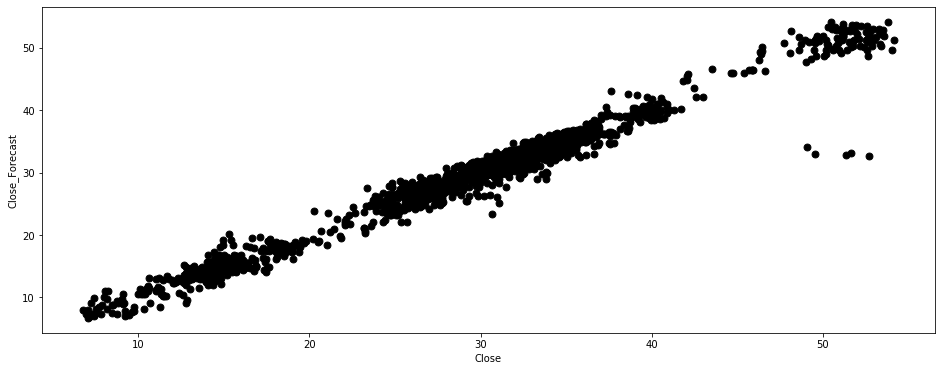

In [42]:
## Here we will visualize the relationship between close and close_forecast variable
import matplotlib.pyplot as plt 
colors = (0,0,0)
area = np.pi*15

# relation between X and Y variable Plot
plt.figure(figsize=(16, 6))

plt.scatter(df1['close'], df1['close_frcst'], s=area, c=colors)
plt.xlabel("Close")
plt.ylabel("Close_Forecast")
#plt.scatter(X_train, Y_train)

## Scatter Plots for all variables with respect to one another

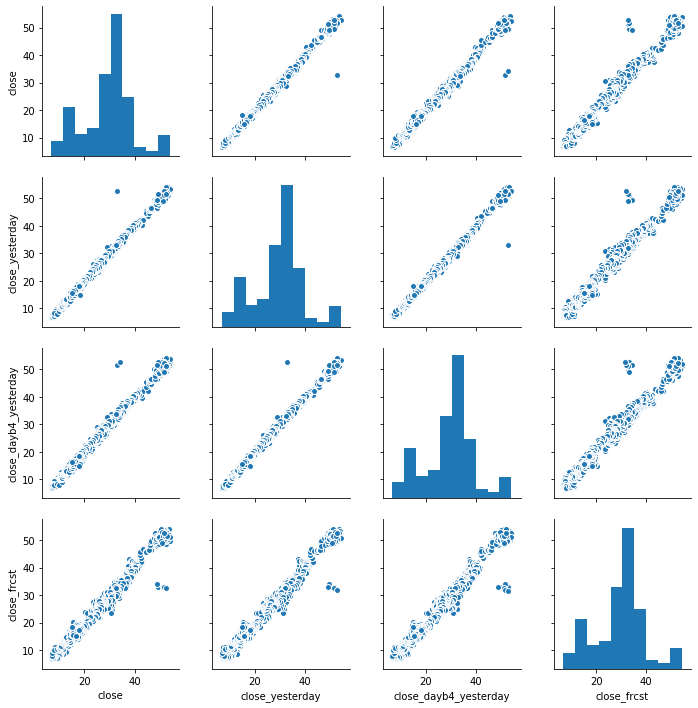

In [43]:
import seaborn as sns
# VISUALIZING THE SCATTER PLOT OF X VARIABLES WITH Y VARIABLE
sns.pairplot(df1[['close','close_yesterday','close_dayb4_yesterday','close_frcst']])

## Linear Regression Model

In [47]:
learner = linear_model.LinearRegression(); #initializing linear regression model

learner.fit(X_train,Y_train); #training the linear regression model
score=learner.score(X_test,Y_test);#testing the linear regression model

In [48]:
print('Score: ',score)


Score:  0.97492670887972


In [49]:
y_predict = learner.predict(X_lately)
y_predict

array([18.16359714, 18.23632759, 17.97308869, 17.70922532, 17.45064682])

In [50]:
(X_test)

array([[ 0.29404678,  0.34089264,  0.35052773],
       [ 0.13994018,  0.16913302,  0.03999772],
       [-1.8933194 , -1.95811196, -1.9732235 ],
       ...,
       [ 0.18441137,  0.20120724,  0.22941648],
       [ 0.81632386,  0.81993879,  0.84115616],
       [ 0.47812742,  0.36157844,  2.4030877 ]])

Text(0, 0.5, 'Close_Forecast')

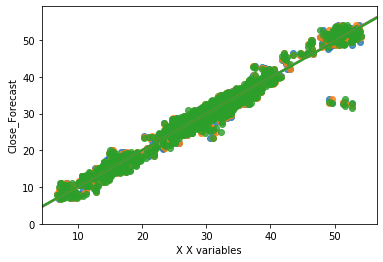

In [51]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')

# Regression Plot
import seaborn as sns
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X Variables')
plt.ylabel('Close_Forecast')

# Regression Plot
import seaborn as sns
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X X variables')
plt.ylabel('Close_Forecast')


In [52]:
X_test

array([[ 0.29404678,  0.34089264,  0.35052773],
       [ 0.13994018,  0.16913302,  0.03999772],
       [-1.8933194 , -1.95811196, -1.9732235 ],
       ...,
       [ 0.18441137,  0.20120724,  0.22941648],
       [ 0.81632386,  0.81993879,  0.84115616],
       [ 0.47812742,  0.36157844,  2.4030877 ]])

In [53]:
 # taking columns individually from X_test, as we can't access columns directly from X_test because X_test is a list of list for all 3 columns
 close_test = pd.Series((row[0] for row in X_test)) 
 close1_test  = pd.Series((row[1] for row in X_test))
 close2_test = pd.Series((row[2] for row in X_test))

Plot for Residuals vs Y variable



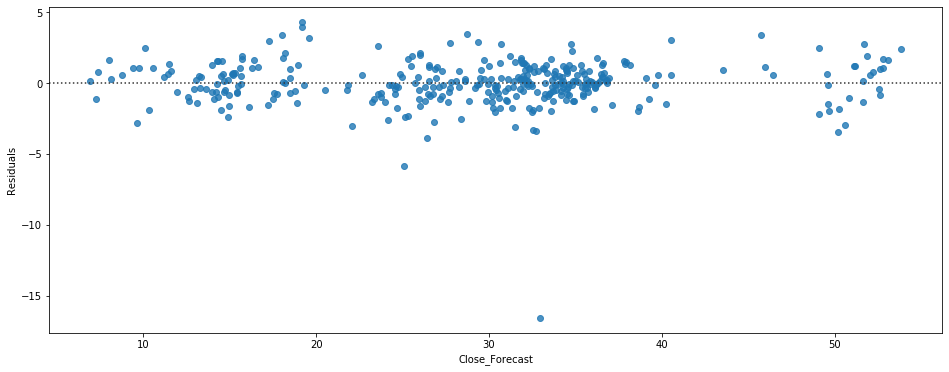

In [54]:
# Residual plot

y_predict =  learner.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)

#1. Residuals vs Y variable
print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')




Plot for Residuals vs close variable


Text(0, 0.5, 'Residuals')

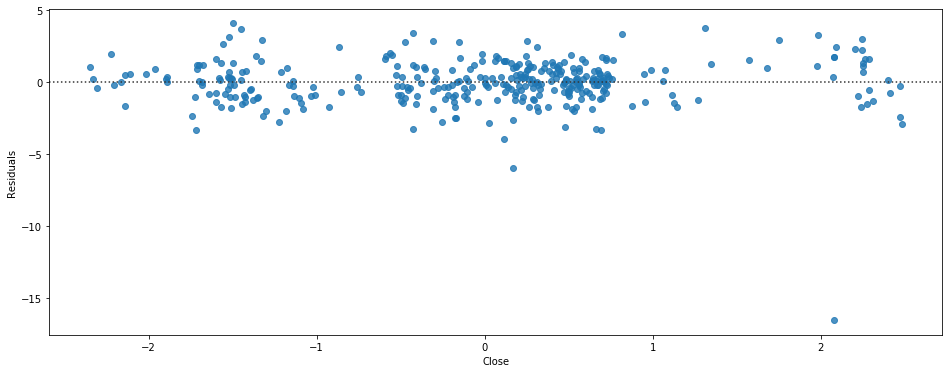

In [55]:
#2. Residuals vs X variables
print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

Plot for Residuals vs close_yesterday variable


Text(0, 0.5, 'Residuals')

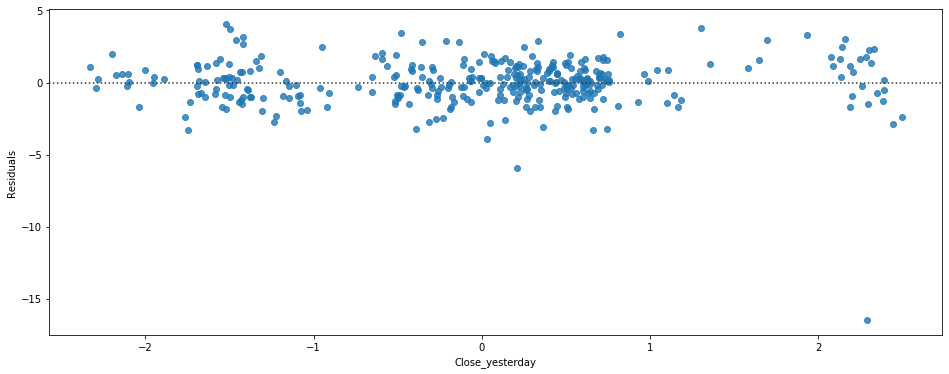

In [56]:
print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

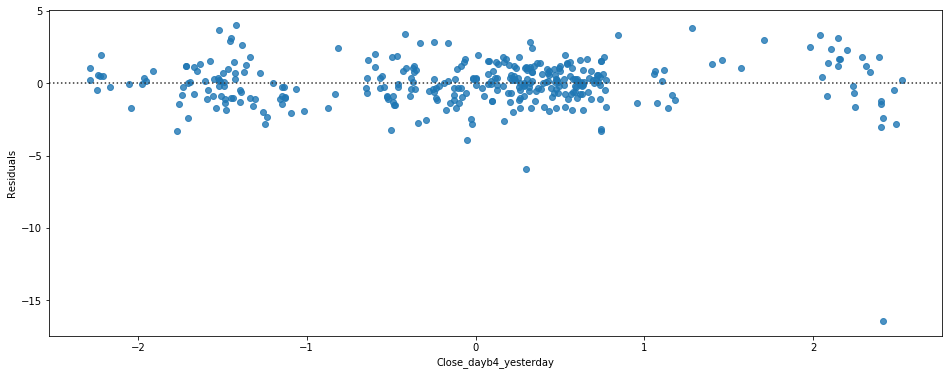

In [57]:
print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

In [58]:
# MAE
from sklearn.metrics import mean_absolute_error

print('MAE: ',(mean_absolute_error(Y_test, y_predict)))


MAE:  1.0924670484309824


In [59]:
#MSE
from sklearn.metrics import mean_squared_error

print('MSE: ',mean_squared_error(Y_test, y_predict))


MSE:  2.656858121579133


In [60]:
#rmse
print('RMSE: ',np.sqrt(mean_squared_error(Y_test, y_predict)))


RMSE:  1.6299871538080088


## Linear Regression with Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score

cross_learner = linear_model.LinearRegression()
cv_4_results = cross_val_score(cross_learner, X, y, cv=4 )

# array of 4 different MSE ( due to 4 fold cross validation,the mse is calculated 4 times with each fold )
cv_4_results

# average for MSE 
print('MSE: ',np.mean(cv_4_results))

MSE:  0.9120048009630065


Text(0, 0.5, 'Close_Forecast')

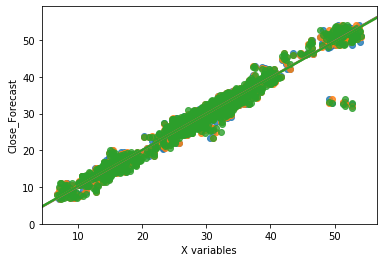

In [62]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')

## Gradient Boosting Regression (GBR)

In [63]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

In [65]:
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gbr = ensemble.GradientBoostingRegressor(**params)

gbr.fit(X_train, Y_train)
print('Score: ',gbr.score(X_test, Y_test))
mse = mean_squared_error(Y_test, gbr.predict(X_test))
print("MSE: %.4f" % mse)

Score:  0.9703500693947442
MSE: 3.1418


Plot for Residuals vs Y variable

Plot for Residuals vs close variable
Plot for Residuals vs close_yesterday variable
Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

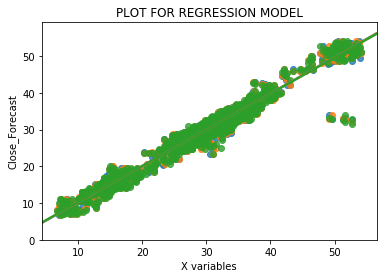

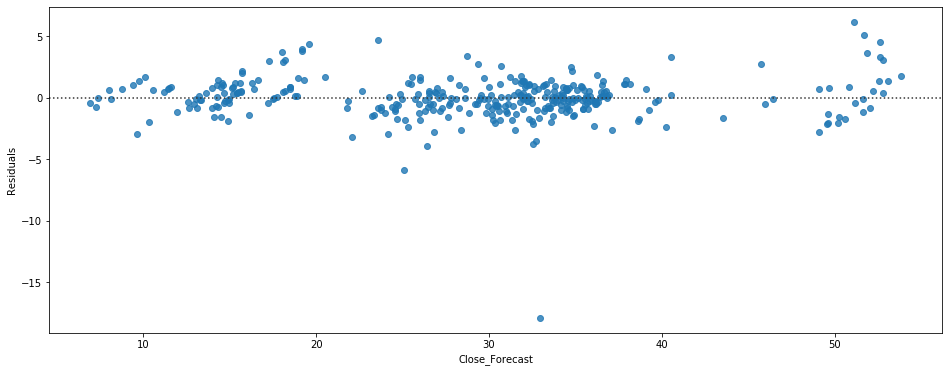

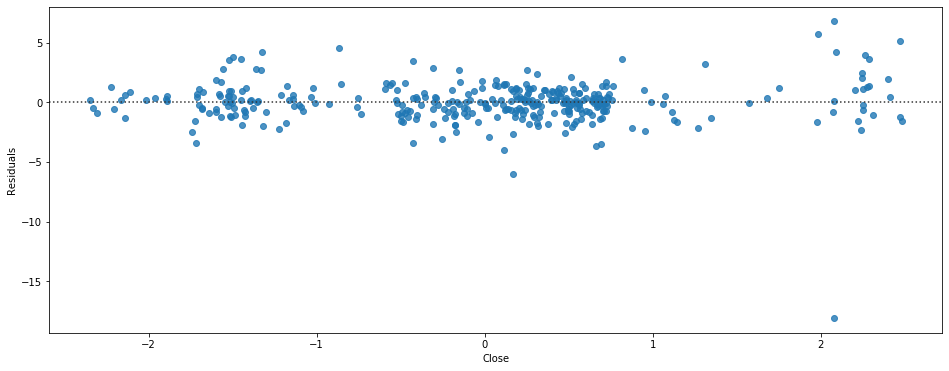

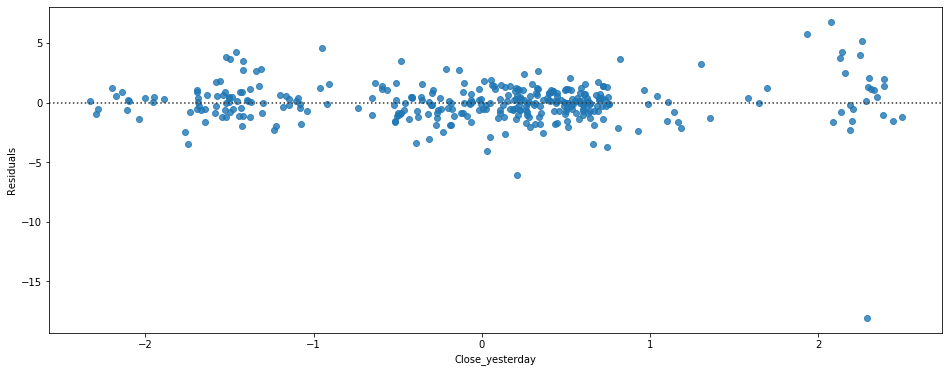

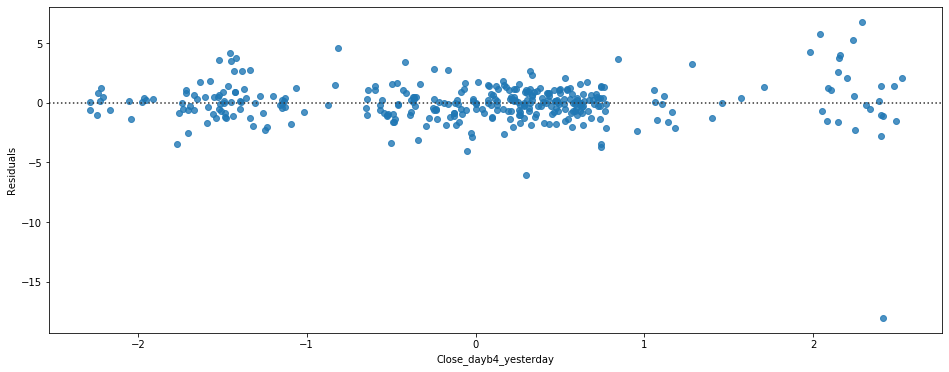

In [66]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])
#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.title('PLOT FOR REGRESSION MODEL')
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')


# Residual plot

y_predict =  gbr.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)

#1. Residual Vs Y
# Residual plot


print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')


#2. Residual vs X variables

print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

## Extreme Gradient Boosting Regression (XGBR)


In [67]:

import xgboost 
#import xgboost as xgb
xgbr = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

#xgb_clf = XGBClassifier()

xgbr.fit(X_train, Y_train)

score = xgbr.score(X_test, Y_test)
print('Score: ',score)
mse1 = mean_squared_error(Y_test, xgbr.predict(X_test))
print('MSE: ',mse1)

Score:  0.9519124213379512
MSE:  5.0955366530244435


Plot for Residuals vs Y variable

Plot for Residuals vs close variable
Plot for Residuals vs close_yesterday variable
Plot for Residuals vs close_dayb4_yesterday variable


Text(0, 0.5, 'Residuals')

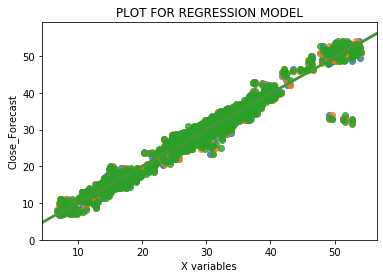

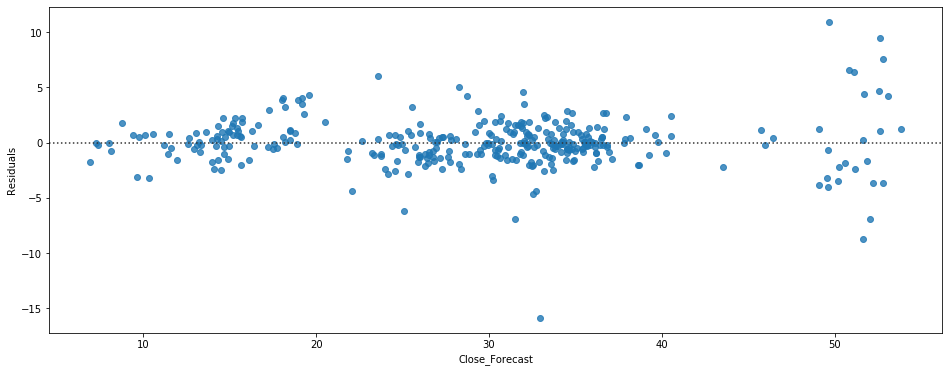

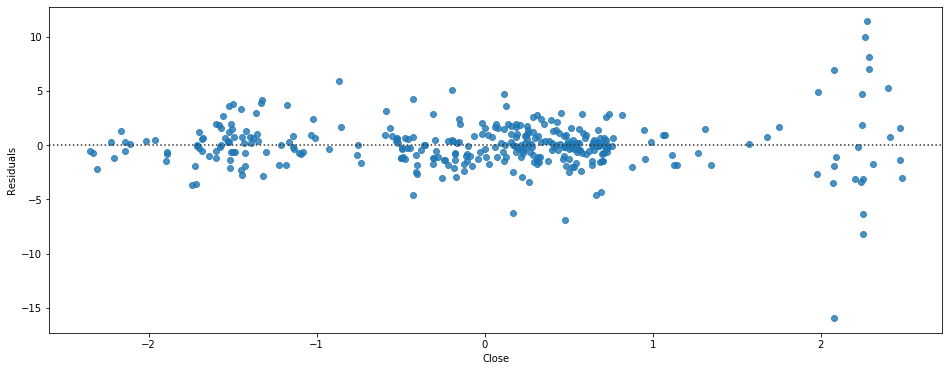

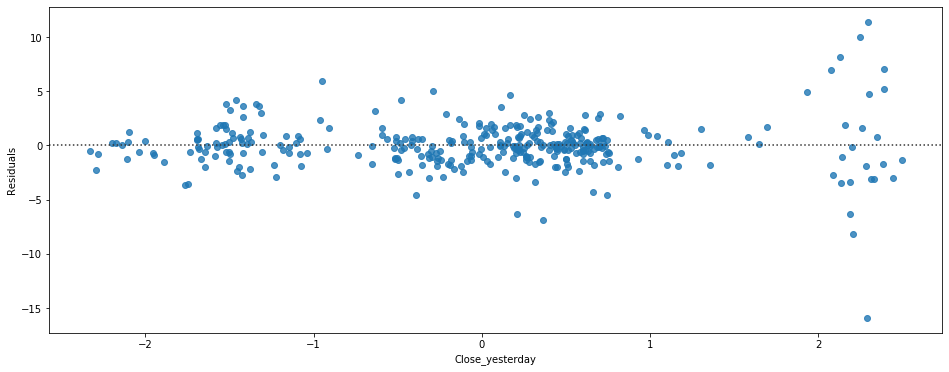

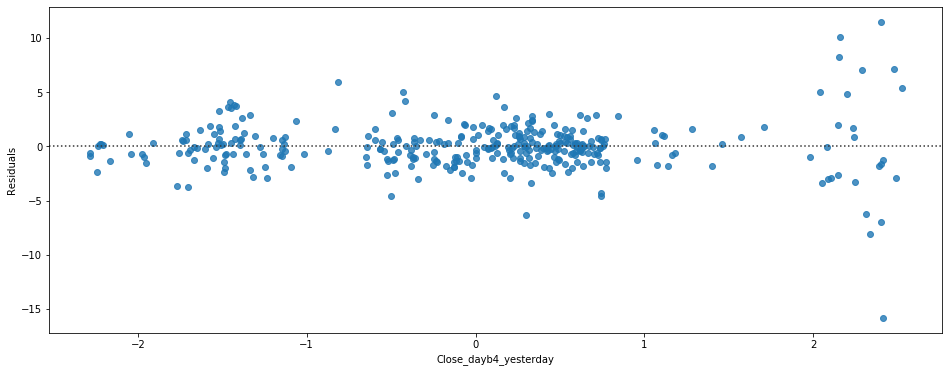

In [68]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.title('PLOT FOR REGRESSION MODEL')
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')


# Residual plot

y_predict =  xgbr.predict(X_test)
e = Y_test - y_predict # calculating rhe residuals/errors (y_test - y_predict)


#1. Residual Vs Y
# Residual plot


print('Plot for Residuals vs Y variable')
plt.figure(figsize=(16, 6))
sns.residplot(Y_test, e)
plt.xlabel('Close_Forecast')
plt.ylabel('Residuals')

print('')


#2. Residuals Vs X variables

print('Plot for Residuals vs close variable')
plt.figure(figsize=(16, 6))
sns.residplot(close_test, e)
plt.xlabel('Close')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close1_test, e)
plt.xlabel('Close_yesterday')
plt.ylabel('Residuals')

print('Plot for Residuals vs close_dayb4_yesterday variable')
plt.figure(figsize=(16, 6))
sns.residplot(close2_test, e)
plt.xlabel('Close_dayb4_yesterday')
plt.ylabel('Residuals')

## XGBR With Cross Validation

In [69]:
# WITH CROSS VALIDATION
from sklearn.model_selection import cross_val_score
xgbr_cross = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 
cv_4_results = cross_val_score(xgbr_cross, X, y, cv=4 )

# array of 4 different MSE ( due to 4 fold cross validation,the mse is calculated 4 times with each fold )
cv_4_results

# average for MSE 
print('MSE: ',np.mean(cv_4_results))

MSE:  0.17040556090874548


Text(0, 0.5, 'Close_Forecast')

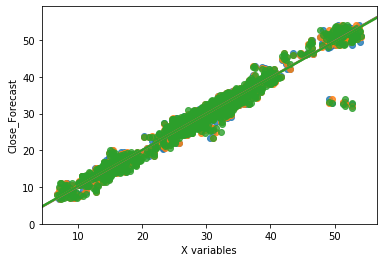

In [70]:
# Regression Plot
import seaborn as sns
sns.regplot(df1['close'], df1['close_frcst'])
sns.regplot(df1['close_yesterday'], df1['close_frcst'])
sns.regplot(df1['close_dayb4_yesterday'], df1['close_frcst'])#plt.scatter(X_test, Y_test)
plt.ylim(0,)
plt.xlabel('X variables')
plt.ylabel('Close_Forecast')